Consider only the data related to the first 36 patients (leave patients
from 37 to 42 for the testing phase of the learning machine), and store
these data into a new matrix data train. Define the matrix
data test with the data of patients from 37 to 42.

In [1]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt 

x = pd.read_csv('parkinsons_updrs.data')

x.test_time = x.test_time - x.test_time.min()
x.test_time = x.test_time.round()

data_train = x[x.subject < 37]
data_test = x[x.subject > 36]
data_train = data_train.groupby(["subject","test_time"]).mean()
data_test = data_test.groupby (["subject","test_time"]).mean()
Npatients = x.loc[:,"subject"].max()

In [2]:
x.columns

Index([u'subject', u'age', u'sex', u'test_time', u'motor_UPDRS',
       u'total_UPDRS', u'Jitter(%)', u'Jitter(Abs)', u'Jitter:RAP',
       u'Jitter:PPQ5', u'Jitter:DDP', u'Shimmer', u'Shimmer(dB)',
       u'Shimmer:APQ3', u'Shimmer:APQ5', u'Shimmer:APQ11', u'Shimmer:DDA',
       u'NHR', u'HNR', u'RPDE', u'DFA', u'PPE'],
      dtype='object')

It is convenient to normalize the data, so that each feature has mean
zero and variance 1; for each column of the matrix (for each feature)
evaluate the mean and subtract it from the column, then evaluate the
variance and divide the zero-mean column by the square root of the
measured variance. Check that the obtained matrix has zero mean and
unit variance for each feature/column.

In [3]:
data_test_1 = pd.Series()
data_test_1 = data_test.copy()
data_test_norm = pd.Series()
data_test_norm = data_test.copy()
data_train_norm = pd.Series()
data_train_norm = data_train.copy()

data_test_norm = (data_test - data_test.mean())/data_test.std()
data_train_norm = (data_train - data_train.mean())/data_train.std()

                    
    #uncomment to check that the two vectors are zero mean and with variance = 1
#     print ('VARIANCE TRAIN NORM',data_train_norm.var())
#     print ('MEAN TRAIN NORM',data_train_norm.mean().round())
#     print('VARIANCE DATA_TEST_NORM',data_test_norm.var())
#     print('MEAN DATA_TEST NORM',data_test_norm.mean().round())

Define F0 as the feature that we want to estimate from the other
features; then generate the column vector
y train=data train norm[:,F0] and the matrix X train from
data train norm by removing column F0. Similarly define y_test=data test norm[:,F0]; and X test from
matrix data test norm by removing column F0.

### Removing and Estimate UPDRS

In [25]:
X_train = data_train_norm.copy()
del X_train['motor_UPDRS']
del X_train['total_UPDRS']
X_test = data_test_norm.copy()
del X_test['motor_UPDRS']
del X_test['total_UPDRS']

#### Motor UPDRS

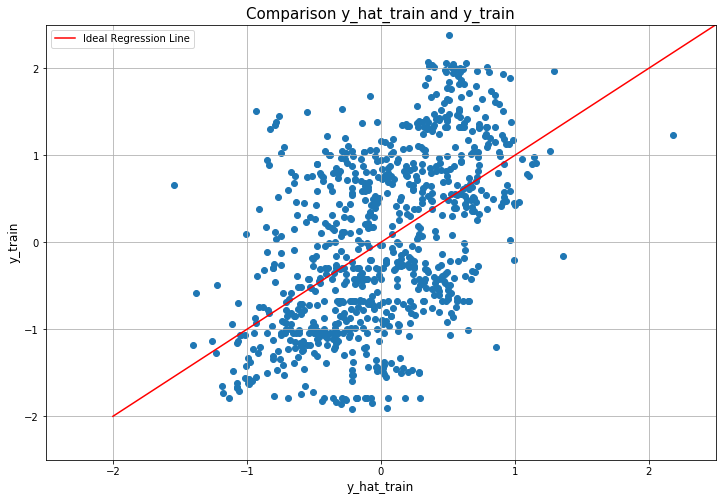

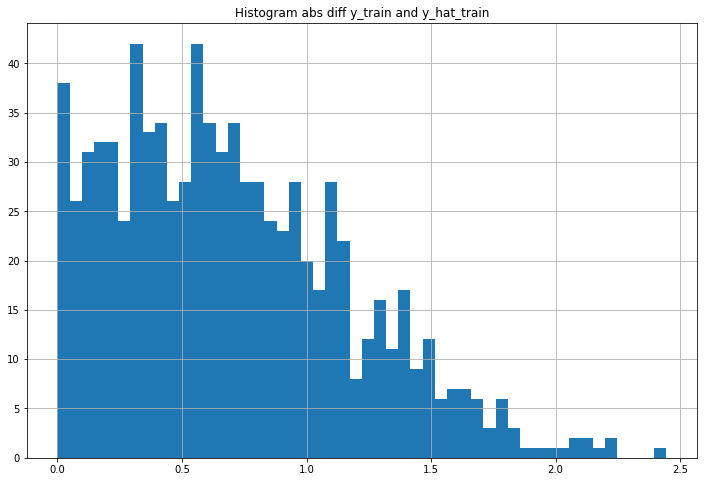

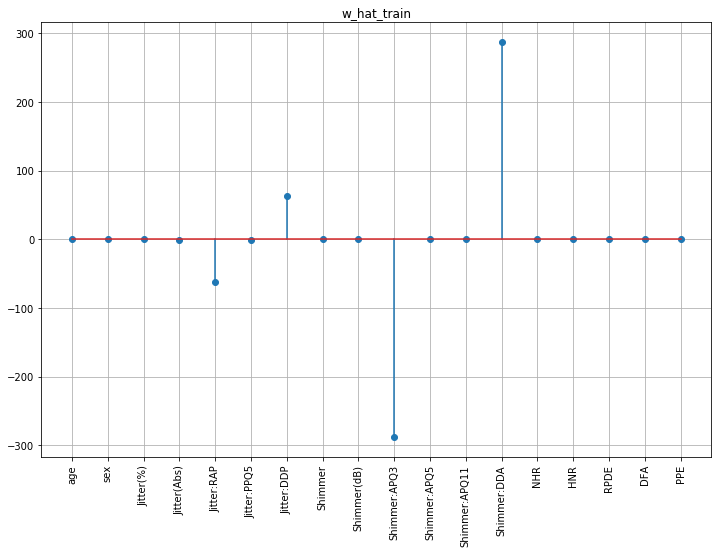

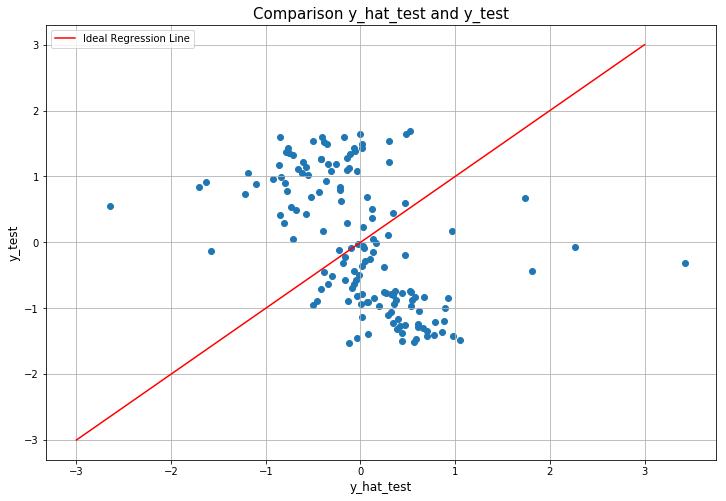

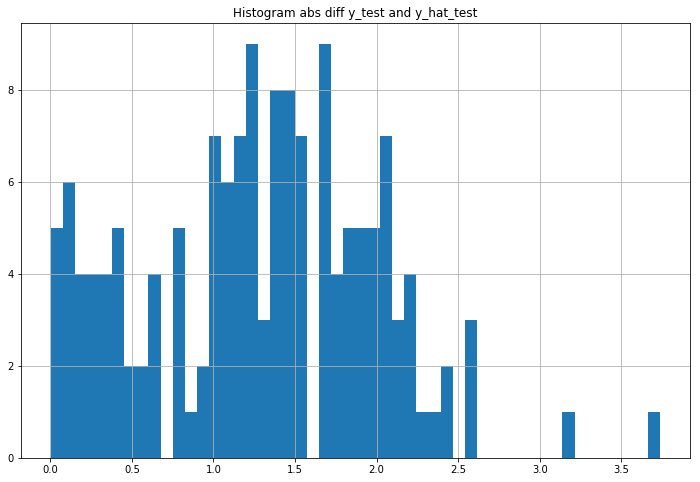

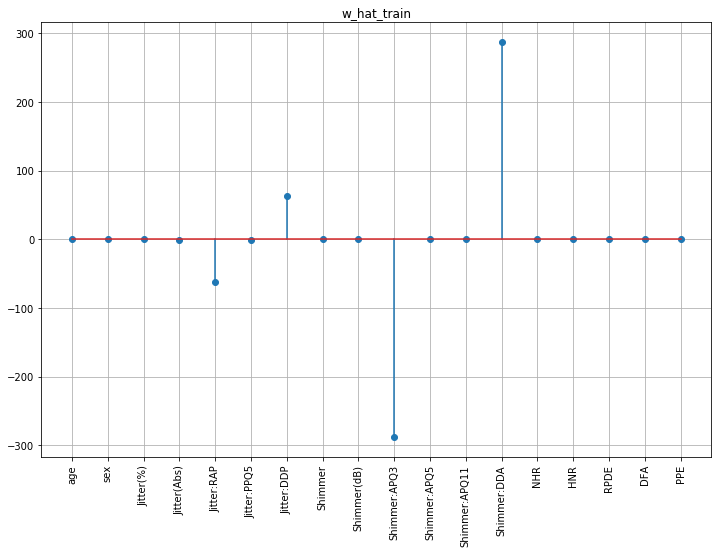

In [35]:
#motorUPDRS
y_train = data_train_norm['motor_UPDRS']
y_test = data_test_norm['motor_UPDRS']


#application on MSE on train
w_hat = np.dot(X_train.transpose(),X_train)
w_hat = np.linalg.pinv(w_hat)
w_hat = np.dot(w_hat, X_train.transpose())
w_hat = np.dot(w_hat,y_train)

y_hat_train = np.dot(X_train,w_hat)

error_mse_train = np.dot(y_train.transpose(),y_train)
second_term = np.dot(y_train.transpose(),y_hat_train)
error_mse_train = error_mse_train - second_term

plt.figure(figsize=(12,8))
x = range(-2,19)
y = range(-2,19)
plt.scatter(y_hat_train,y_train.values)#,'r--')
plt.plot(x,y,'r',label='Ideal Regression Line')
plt.xlabel('y_hat_train',fontsize=12)
plt.ylabel('y_train',fontsize=12)
plt.title('Comparison y_hat_train and y_train',fontsize=15)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
plt.hist(abs(y_train-y_hat_train),bins=50)
plt.title('Histogram abs diff y_train and y_hat_train')
plt.grid()
plt.figure(figsize=(12,8))
plt.stem(w_hat)
plt.title('w_hat_train')
plt.xticks(range(0,len(w_hat)),X_train.columns.values,rotation=90)
plt.grid()

#application MSE on test
y_hat_test = np.dot(X_test,w_hat)
error_mse_test = np.dot(y_test.transpose(),y_hat_test)
second_term = np.dot(y_test.transpose(),y_hat_test)
error_mse_test = error_mse_test - second_term

x = range(-3,4)
y = range(-3,4)
plt.figure(figsize=(12,8))
plt.scatter(y_hat_test,y_test.values)
plt.plot(x,y,'r',label='Ideal Regression Line')
plt.xlabel('y_hat_test',fontsize=12)
plt.ylabel('y_test',fontsize=12)
plt.title('Comparison y_hat_test and y_test',fontsize=15)
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
plt.hist(abs(y_test-y_hat_test),bins=50)
plt.title('Histogram abs diff y_test and y_hat_test')
plt.grid()
plt.figure(figsize=(12,8))
plt.stem(w_hat)
plt.title('w_hat_train')
plt.xticks(range(0,len(w_hat)),X_train.columns.values,rotation=90)
plt.grid()

plt.show()

#### Total UPDRS

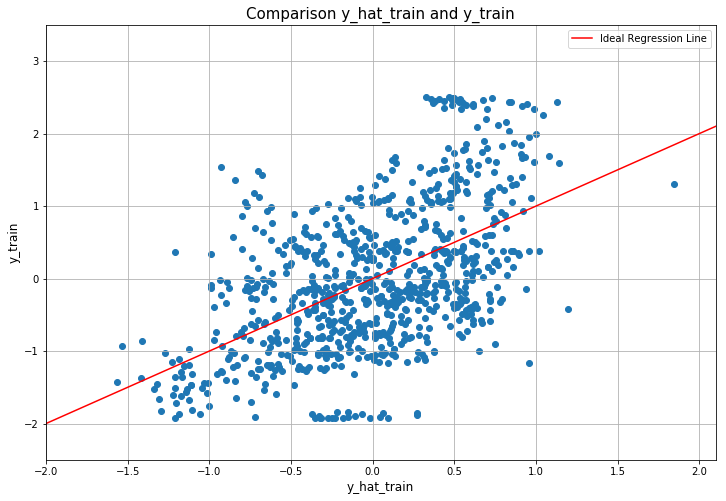

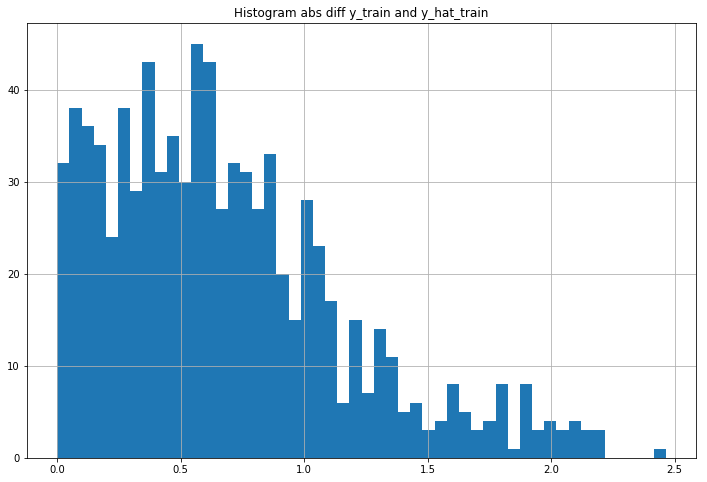

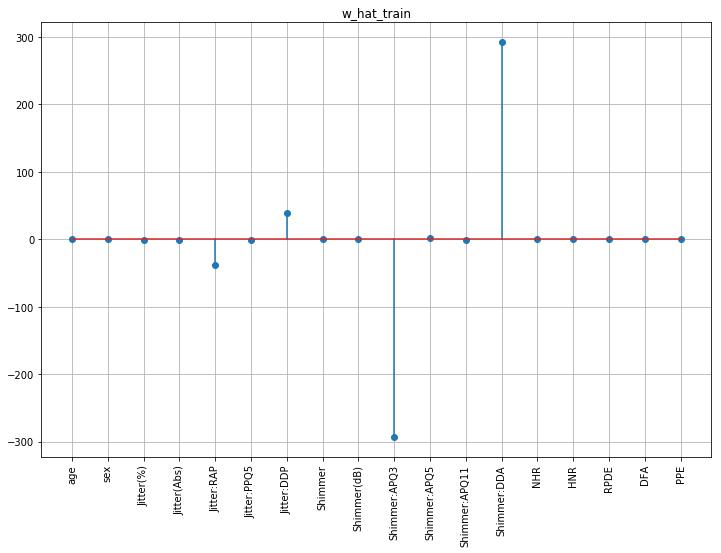

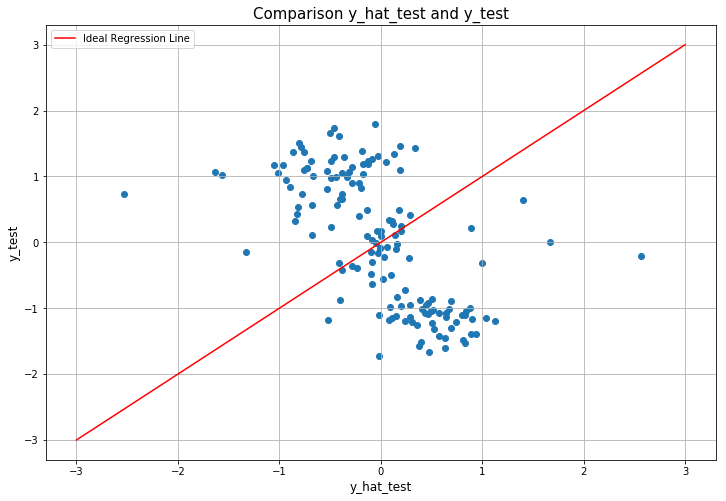

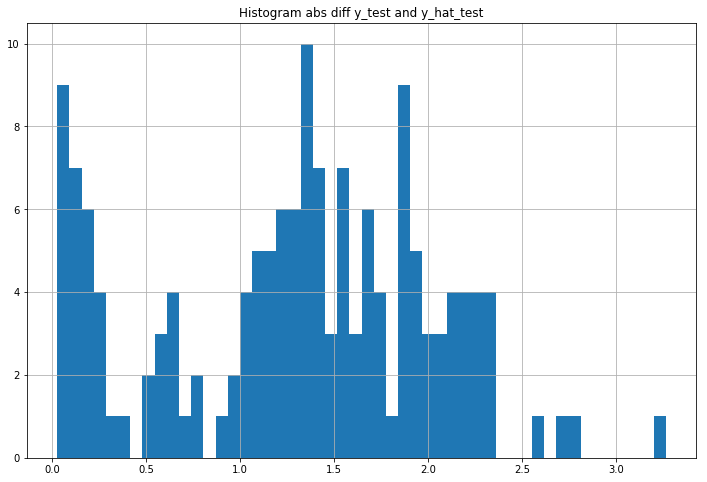

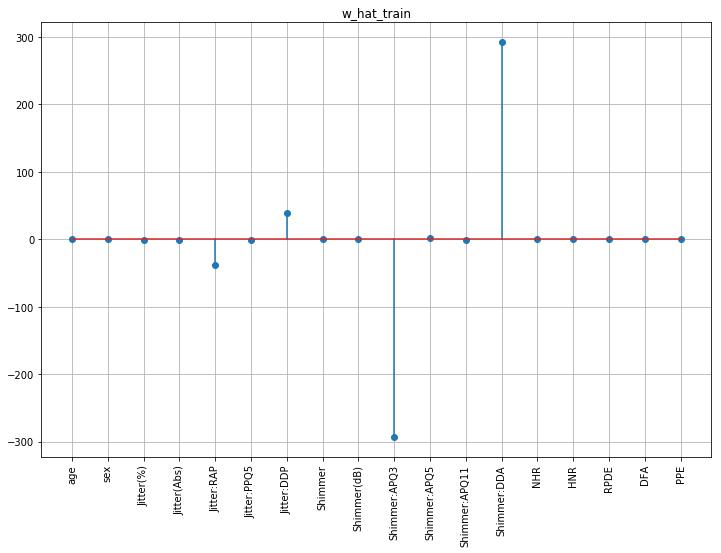

In [39]:
#motorUPDRS
y_train = data_train_norm['total_UPDRS']
y_test = data_test_norm['total_UPDRS']


#application on MSE on train
w_hat = np.dot(X_train.transpose(),X_train)
w_hat = np.linalg.pinv(w_hat)
w_hat = np.dot(w_hat, X_train.transpose())
w_hat = np.dot(w_hat,y_train)

y_hat_train = np.dot(X_train,w_hat)

error_mse_train = np.dot(y_train.transpose(),y_train)
second_term = np.dot(y_train.transpose(),y_hat_train)
error_mse_train = error_mse_train - second_term

plt.figure(figsize=(12,8))
x = range(-2,19)
y = range(-2,19)
plt.scatter(y_hat_train,y_train.values)#,'r--')
plt.plot(x,y,'r',label='Ideal Regression Line')
plt.xlabel('y_hat_train',fontsize=12)
plt.ylabel('y_train',fontsize=12)
plt.title('Comparison y_hat_train and y_train',fontsize=15)
plt.xlim(-2,2.1)
plt.ylim(-2.5,3.5)
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
plt.hist(abs(y_train-y_hat_train),bins=50)
plt.title('Histogram abs diff y_train and y_hat_train')
plt.grid()
plt.figure(figsize=(12,8))
plt.stem(w_hat)
plt.title('w_hat_train')
plt.xticks(range(0,len(w_hat)),X_train.columns.values,rotation=90)
plt.grid()

#application MSN on test
y_hat_test = np.dot(X_test,w_hat)
error_mse_test = np.dot(y_test.transpose(),y_hat_test)
second_term = np.dot(y_test.transpose(),y_hat_test)
error_mse_test = error_mse_test - second_term
x = range(-3,4)
y = range(-3,4)
plt.figure(figsize=(12,8))
plt.scatter(y_hat_test,y_test.values)
plt.plot(x,y,'r',label='Ideal Regression Line')
plt.xlabel('y_hat_test',fontsize=12)
plt.ylabel('y_test',fontsize=12)
plt.title('Comparison y_hat_test and y_test',fontsize=15)
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
plt.hist(abs(y_test-y_hat_test),bins=50)
plt.title('Histogram abs diff y_test and y_hat_test')
plt.grid()
plt.figure(figsize=(12,8))
plt.stem(w_hat)
plt.title('w_hat_train')
plt.xticks(range(0,len(w_hat)),X_train.columns.values,rotation=90)
plt.grid()
plt.show()

### Removing and Estimate Jitter(%)

In [47]:
FO = 'Jitter(%)'
y_train = data_train_norm[FO]
X_train = data_train_norm.copy()
del X_train[FO]
y_test = data_test_norm[FO]
X_test = data_test_norm.copy()
del X_test[FO]

#### MINIMUM SQUARED ERROR

##### TRAIN

In [48]:
#application on MSE on train
w_hat = np.dot(X_train.transpose(),X_train)
w_hat = np.linalg.pinv(w_hat)
w_hat = np.dot(w_hat, X_train.transpose())
w_hat = np.dot(w_hat,y_train)

y_hat_train = np.dot(X_train,w_hat)

error_mse_train = np.dot(y_train.transpose(),y_train)
second_term = np.dot(y_train.transpose(),y_hat_train)
error_mse_train = error_mse_train - second_term

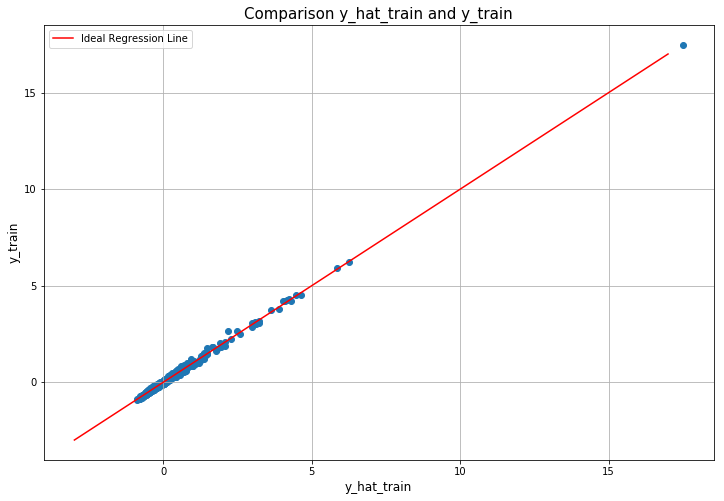

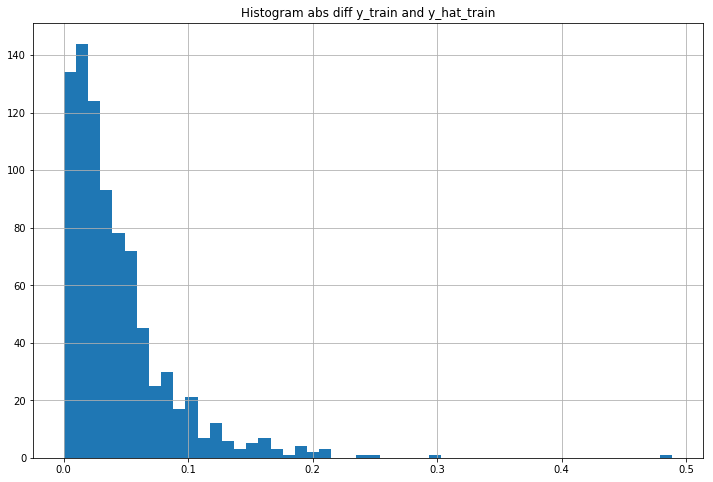

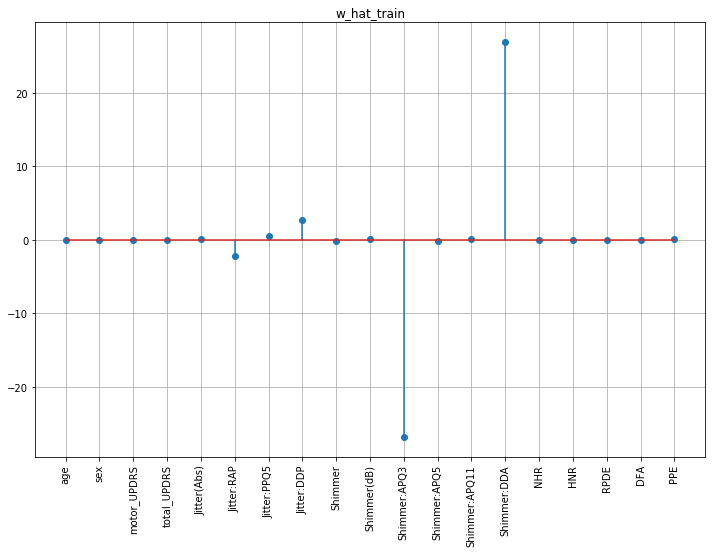

In [50]:
plt.figure(figsize=(12,8))
x = range(-3,18)
y = range(-3,18)
plt.scatter(y_hat_train,y_train.values)#,'r--')
plt.plot(x,y,'r',label='Ideal Regression Line')
plt.xlabel('y_hat_train',fontsize=12)
plt.ylabel('y_train',fontsize=12)
plt.title('Comparison y_hat_train and y_train',fontsize=15)
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
plt.hist(abs(y_train-y_hat_train),bins=50)
plt.title('Histogram abs diff y_train and y_hat_train')
plt.grid()
plt.figure(figsize=(12,8))
plt.stem(w_hat)
plt.title('w_hat_train')
plt.xticks(range(0,len(w_hat)),X_train.columns.values,rotation=90)
plt.grid()
plt.show()

##### TEST

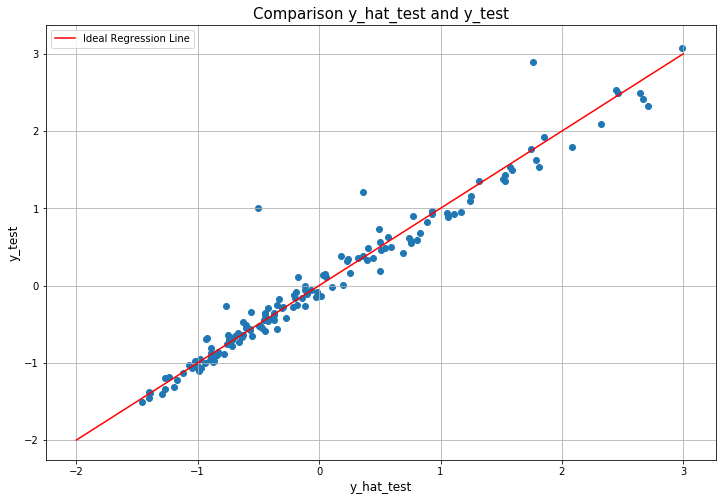

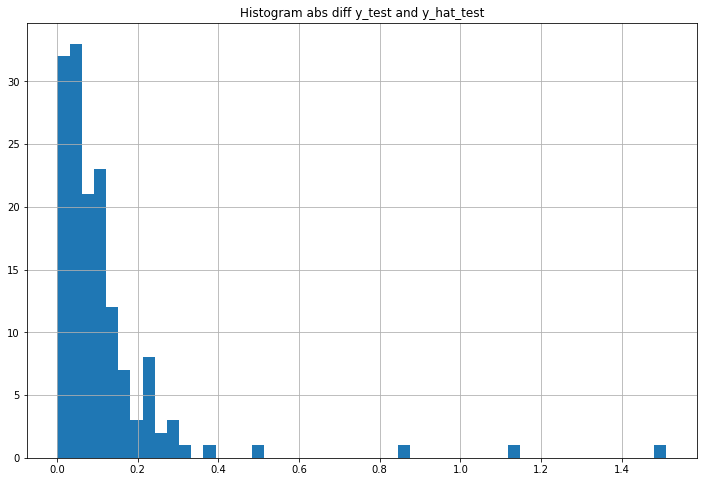

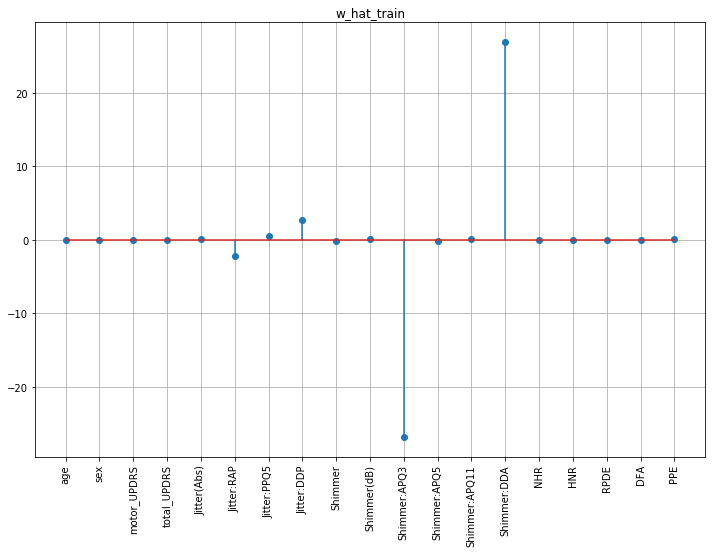

In [52]:
y_hat_test = np.dot(X_test,w_hat)

error_mse_test = np.dot(y_test.transpose(),y_hat_test)

second_term = np.dot(y_test.transpose(),y_hat_test)
error_mse_test = error_mse_test - second_term

plt.figure(figsize=(12,8))
plt.plot(range(-2,4),range(-2,4),'r',label='Ideal Regression Line')
plt.scatter(y_hat_test,y_test.values)
plt.xlabel('y_hat_test',fontsize=12)
plt.ylabel('y_test',fontsize=12)
plt.title('Comparison y_hat_test and y_test',fontsize=15)
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
plt.hist(abs(y_test-y_hat_test),bins=50)
plt.title('Histogram abs diff y_test and y_hat_test')
plt.grid()
plt.figure(figsize=(12,8))
plt.stem(w_hat)
plt.title('w_hat_train')
plt.xticks(range(0,len(w_hat)),X_train.columns.values,rotation=90)
plt.grid()
plt.show()

### GRADIENT ALGORITHM

In [93]:
epsilon = 0.5e-6
w_hat_grad = w_hat
w_hat_next = np.random.randn(19,)
gamma = 8e-6
iterations = 0
while np.linalg.norm(w_hat_next - w_hat_grad) > epsilon:
    w_hat_grad = w_hat_next
    delta_e = -2*np.dot(X_train.transpose(),y_train) + 2*np.dot(np.dot(X_train.transpose(),X_train),w_hat_grad)
    w_hat_next = w_hat_grad - gamma*delta_e
    iterations = iterations+1
iterations

198046

#### TRAIN

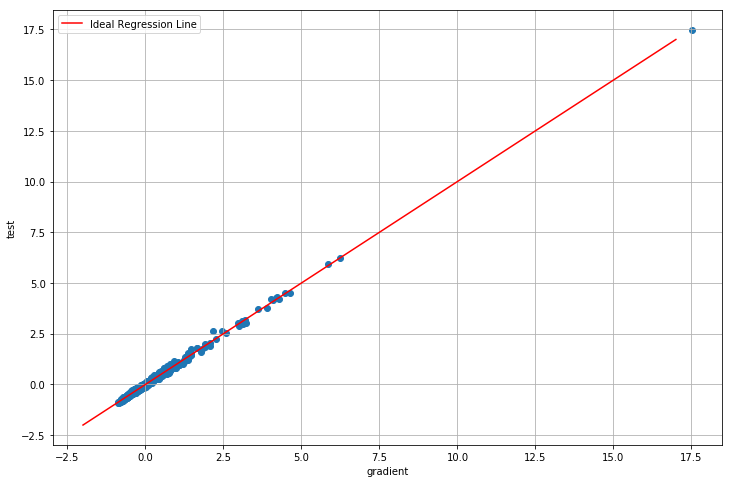

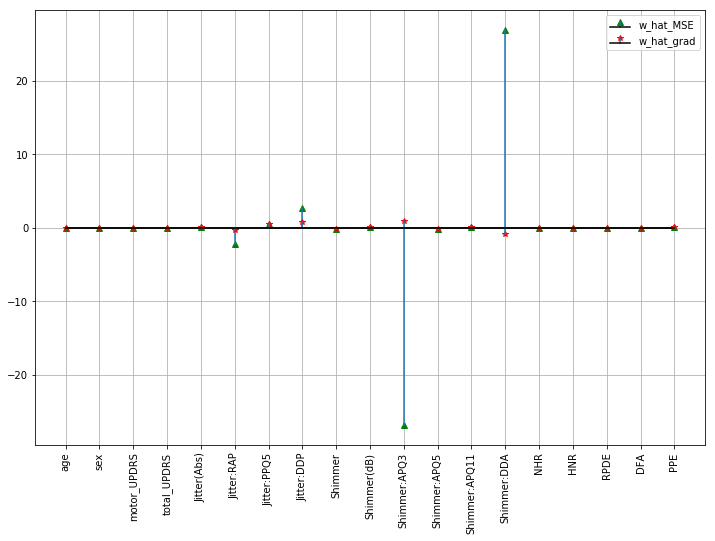

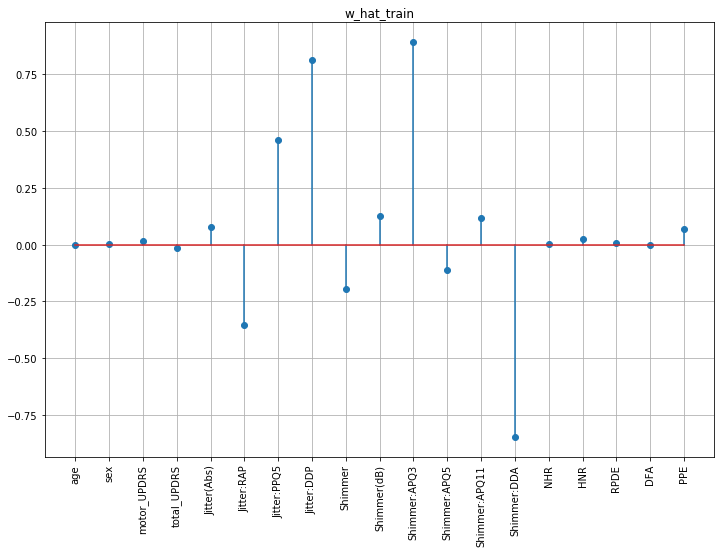

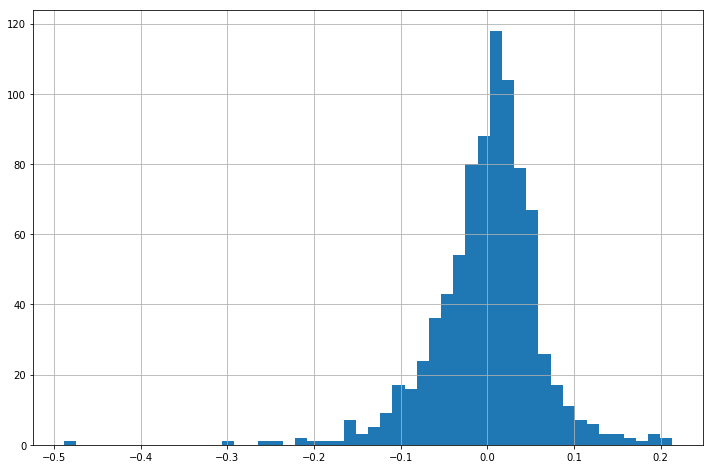

In [100]:
y_hat_gradient_train = np.dot(X_train,w_hat)

plt.figure(figsize=(12,8))
x = range(-2,18)
y = range(-2,18)
plt.scatter(y_hat_gradient_train,y_train.values)
plt.plot(x,y,'r',label='Ideal Regression Line')
plt.xlabel('gradient')
plt.ylabel('test')
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
plt.stem(w_hat,markerfmt='g^',label='w_hat_MSE',basefmt='black')
# plt.figure(figsize=(12,8))
plt.stem(w_hat_grad,markerfmt='r*',label = 'w_hat_grad',basefmt='black')
plt.xticks(range(0,len(w_hat_grad)),X_train.columns.values,rotation=90)
plt.legend()
plt.grid()
plt.figure(figsize=(12,8))
plt.stem(w_hat_grad)
plt.title('w_hat_train')
plt.xticks(range(0,len(w_hat)),X_train.columns.values,rotation=90)
plt.grid()
plt.show() 
plt.figure(figsize=(12,8))
nbins = 50
a,b,c=plt.hist(y_hat_gradient_train - y_train,bins=nbins)
plt.grid()

#### TEST

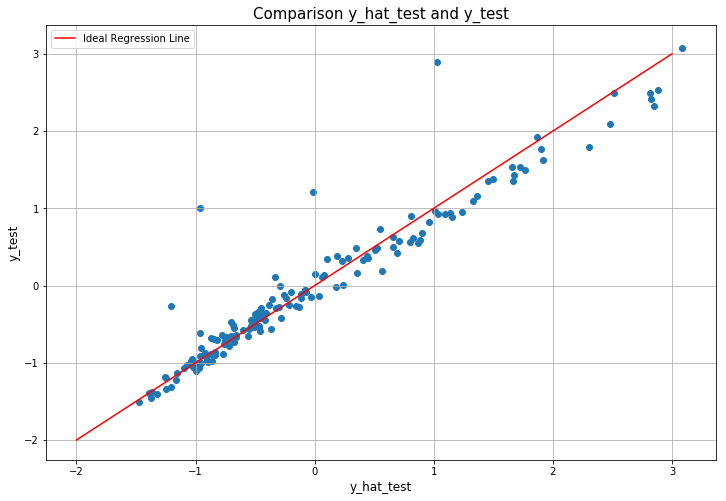

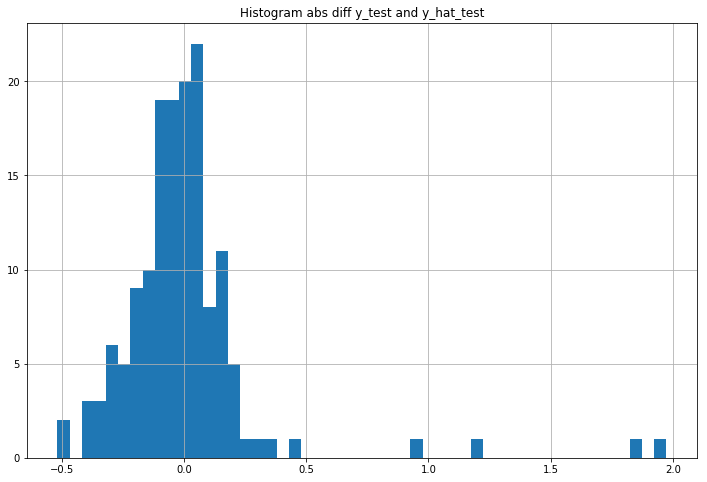

In [104]:
y_hat_grad_test = np.dot(X_test,w_hat_grad)

plt.figure(figsize=(12,8))
plt.plot(range(-2,4),range(-2,4),'r',label='Ideal Regression Line')
plt.scatter(y_hat_test,y_test.values)
plt.xlabel('y_hat_test',fontsize=12)
plt.ylabel('y_test',fontsize=12)
plt.title('Comparison y_hat_test and y_test',fontsize=15)
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
plt.hist(y_test-y_hat_test,bins=50)
plt.title('Histogram abs diff y_test and y_hat_test')
plt.grid()

### Steepest Descent

In [105]:
np.random.seed(5000)
w_hat_sd = np.random.randn(19,)
y_hat_train = np.dot(X_train,w_hat_sd)
r_new = abs(y_train - y_hat_train).values.sum()
abs(y_train-y_hat_train).values.sum()

import numpy as np
import math
r = []
while r_new > 40:
    r_old = r_new
    gradient = -2*(X_train.transpose()).dot(y_train) + 2*((X_train.transpose()).dot(X_train)).dot(w_hat_sd)
    H = 4*X_train.transpose().dot(X_train)
    w_hat_sd = w_hat_sd - (math.pow((np.linalg.norm(gradient)),2)/((gradient.transpose().dot(H)).dot(gradient)))*gradient
    y_hat_train = np.dot(X_train,w_hat_sd)
    r_new = abs(y_train - y_hat_train).values.sum()
    r.append(r_new)
    #expecting difference to go down. having opposite instead

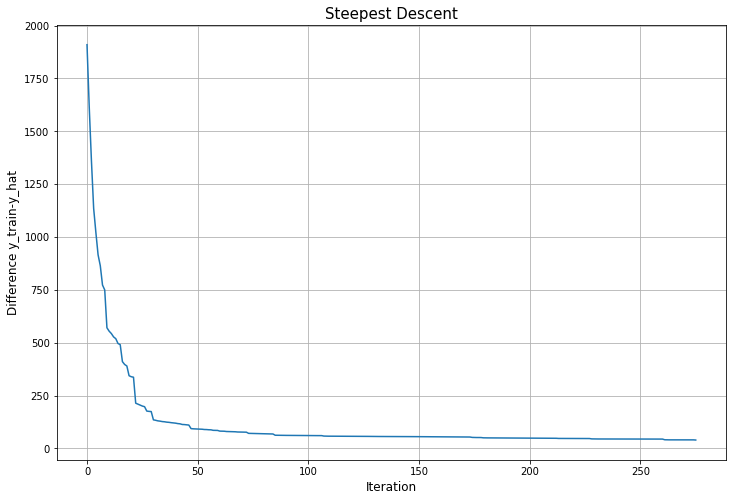

In [106]:
plt.figure(figsize=(12,8))
plt.plot(r)
plt.xlabel('Iteration',fontsize=12)
plt.ylabel('Difference y_train-y_hat',fontsize=12)
plt.title('Steepest Descent',fontsize=15)
plt.grid()

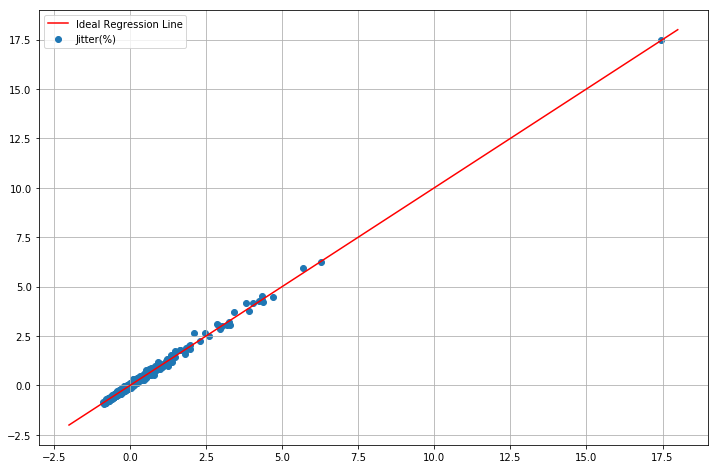

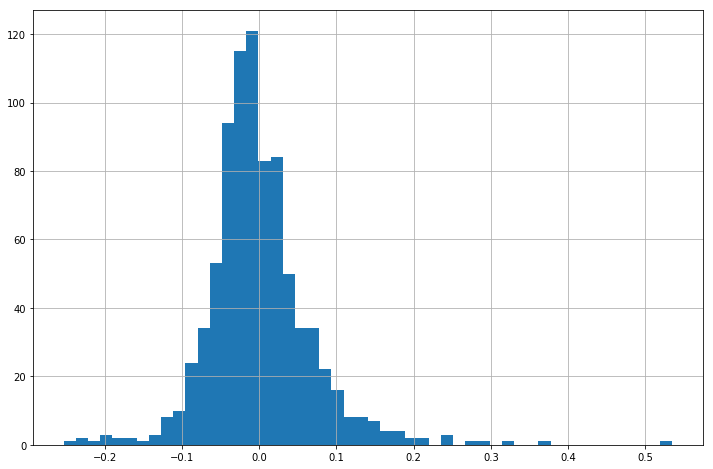

In [111]:
plt.figure(figsize=(12,8))
plt.plot(range(-2,19),range(-2,19),'r',label='Ideal Regression Line')
plt.scatter(y_hat_train,y_train)
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
plt.hist(y_train-y_hat_train,bins=50)
plt.grid()

#### TEST

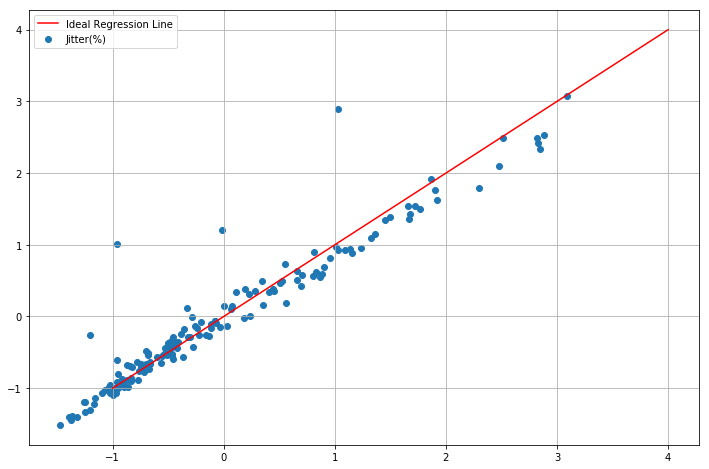

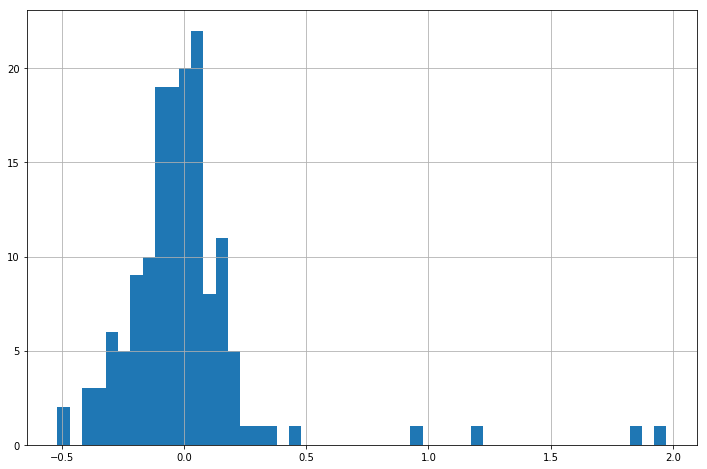

In [114]:
y_hat_test = X_test.dot(w_hat_sd)
x = range(-1,5)
y = range(-1,5)
plt.figure(figsize=(12,8))
plt.scatter(y_hat_test,y_test)
plt.plot(x,y,'r',label='Ideal Regression Line')
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
a,b,c = plt.hist(y_test-y_hat_test,bins=50)
plt.grid()

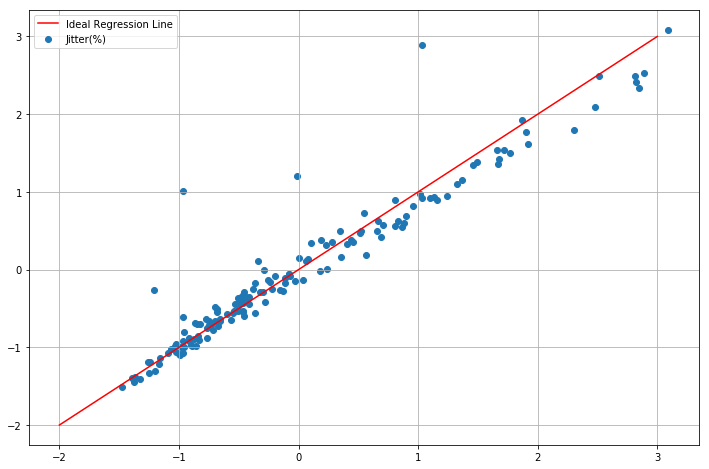

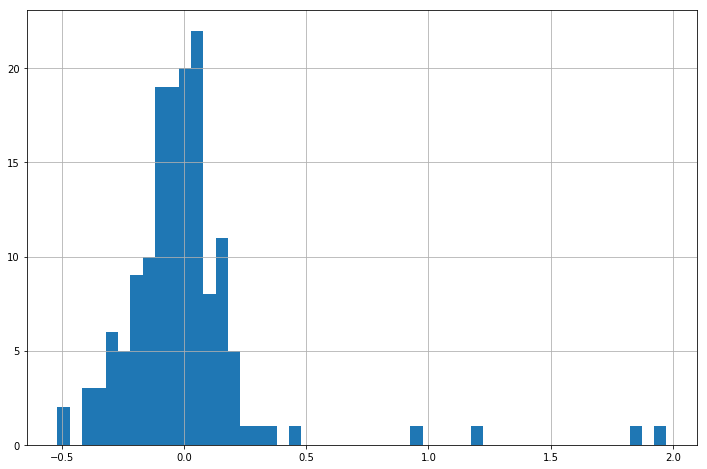

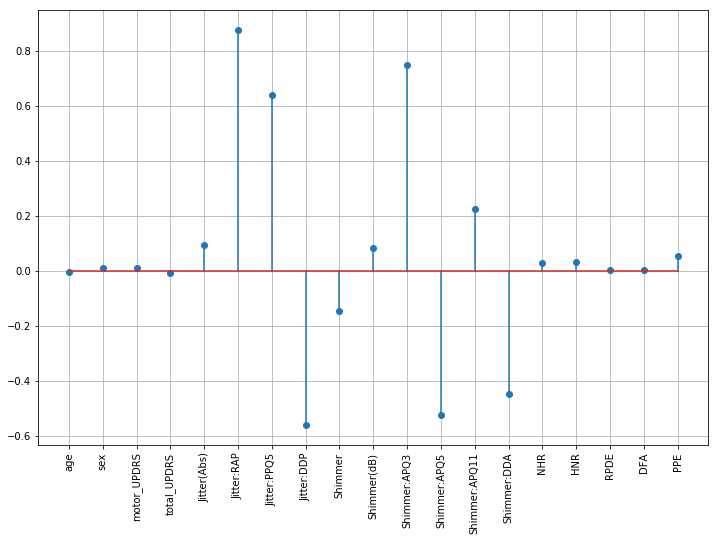

In [76]:
x = range(-2,5)
y = range(-2,5)
plt.figure(figsize=(12,8))
plt.scatter(y_hat_test,y_test)
plt.plot(x,y,'r',label='Ideal Regression Line')
plt.grid()
plt.legend()

plt.figure(figsize=(12,8))
a,b,c = plt.hist(y_test-y_hat_test,bins=50)
plt.grid()

plt.figure(figsize=(12,8))
plt.stem(w_hat_sd)
plt.xticks(range(0,len(w_hat)),X_train.columns.values,rotation=90)
plt.grid()

### PCR

#### TRAIN

In [90]:
N, F = X_train.shape
percent = 0.9
Rx = X_train.T.dot(X_train)/N
eig_values, eig_vectors = np.linalg.eig(Rx)
P = eig_values.sum()
order = np.flip(np.argsort(eig_values), 0)
sum_eig_values = 0
L = 0
keep = []
while sum_eig_values < percent*P:
    sum_eig_values += eig_values[order[L]]
    keep.append(order[L])
    L += 1
to_delete = np.setdiff1d(range(len(eig_values)), keep)
eig_values_L = np.delete(eig_values, to_delete)
lambda_L = np.eye(L)*eig_values_L
eig_vectors_L = np.delete(eig_vectors, to_delete, 1)

temp = eig_vectors_L.dot(np.linalg.inv(lambda_L))/N
w_hat_pcr = temp.dot(eig_vectors_L.T).dot(X_train.T).dot(y_train)
print len(keep),len(eig_values)

6 19


#### TRAIN

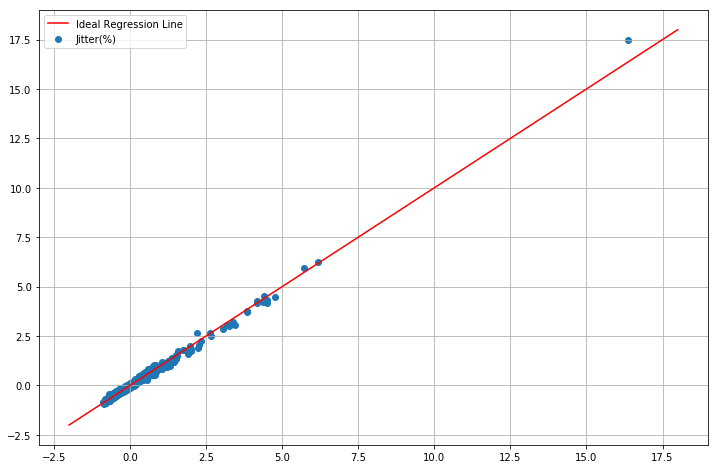

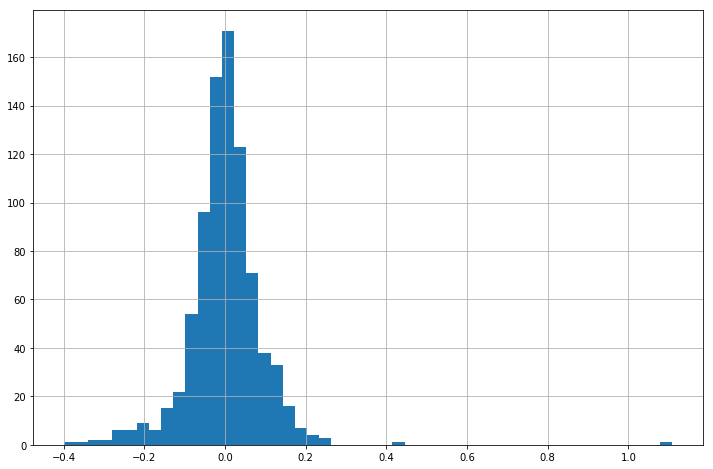

In [118]:
y_hat_train_pcr = X_train.dot(w_hat_pcr)
plt.figure(figsize=(12,8))
plt.scatter(y_hat_train_pcr,y_train)
plt.plot(range(-2,19),range(-2,19),'r',label='Ideal Regression Line')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(12,8))
plt.hist(y_train-y_hat_train_pcr,bins=50)
plt.grid()
plt.show()

#### TEST

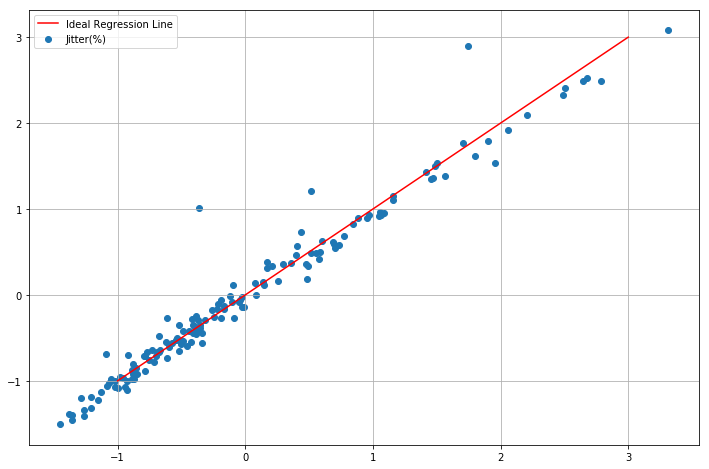

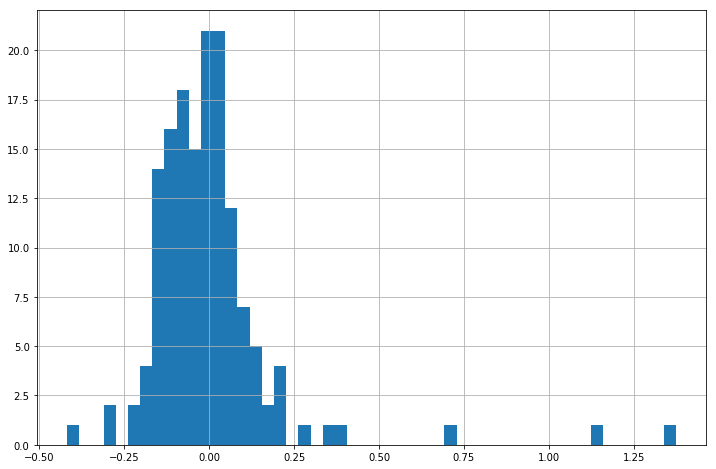

In [119]:
y_hat_test_pcr = X_test.dot(w_hat_pcr)
x = range(-1,4)
y = range(-1,4)
plt.figure(figsize=(12,8))
plt.scatter(y_hat_test_pcr,y_test)
plt.plot(x,y,'r',label='Ideal Regression Line')
plt.grid()
plt.legend()
plt.figure(figsize=(12,8))
a,b,c = plt.hist(y_test-y_hat_test_pcr,bins=50)
plt.grid()